In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import seaborn as sns
from textwrap import wrap
from matplotlib.pyplot import figure
from collections import Counter
color_options = list(matplotlib.colors.get_named_colors_mapping().values())[:(len(list((set(ascending_question_categories)))))]
!pip install kneed
from kneed import KneeLocator



In [336]:
####DATASET DEPENDENT PARAMETERS

#dataset = '2010Morocco(National).csv'
dataset = '2016Morocco(National).csv'

ascending_question_numbers_raw = np.array([6, 9, 10, 15, 16, 17, 20, 22, 23, 26, 29, 30, 32, 41, 42, 43, 52, 53, 58])-1

#2010 offset
#offset = np.array([0,0,0,0,0,0,-1,-2,-2,-2,-2,-2,-2,-8, -8, -8, -13, -13, -13])
#2016 offset
offset = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])


ascending_question_numbers = ascending_question_numbers_raw+offset

ascending_question_categories = ['nutrition','nutrition','nutrition','physical safety','physical safety','physical safety','mental health','mental health','mental health','mental health','tobacco use','tobacco use','tobacco use','drug use','drug use','drug use','physical activity','education','home life']



In [337]:
#Import CSV and store the participant answers
raw_data = open(dataset).readlines()
headers = raw_data[0].split(',')[:1+raw_data[0].split(',').index('Q58')]
answers = []
for participant in raw_data[1:]:
    answers.append(participant.split(',')[:58])

In [338]:
#Function to visualize basic statistics of the participants
def responses_by_question_stats(question, label, ticks, type_plot):
    
    responses = []
    for participant in range(len(answers)):
        response = answers[participant][question]
        if response!='':
            responses.append(float(response))
    
    if type_plot == 'bar':
        c = Counter(responses)
        c = sorted(c.items())
        responses_num = [i[0] for i in c]
        freq = [i[1] for i in c]

        f, ax = plt.subplots(figsize=(12, 6))

        plt.bar(ticks, freq, color=color_options[:len(c)])
        plt.xlabel(label)
        plt.ylabel("Frequency")
        plt.show()
    
    if type_plot == 'hist':

        fig = plt.figure()
        ax = fig.add_axes([1,1,1,1])
        plt.hist(responses, bins = len(list(set(responses))), color = color_options[0])
        ax.set_ylabel('Frequency')
        ax.set_xlabel(label)
        if ticks!=None:
            ax.set_xticks(range(1,1+len(ticks)))
            ax.set_xticklabels(ticks)
        plt.show()
    
    return responses

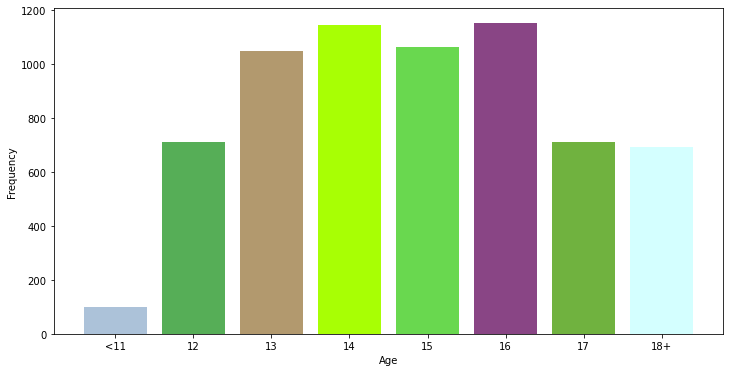

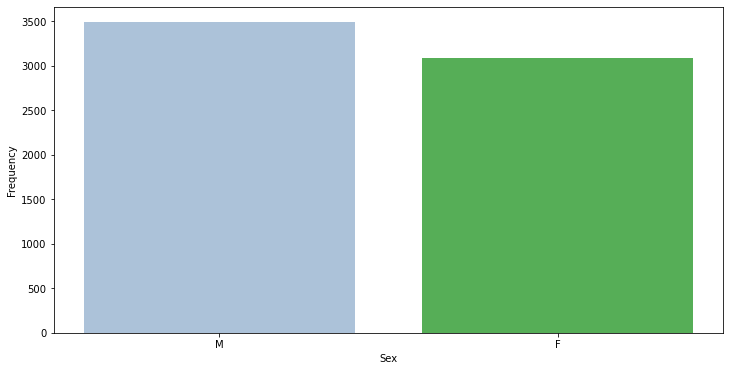

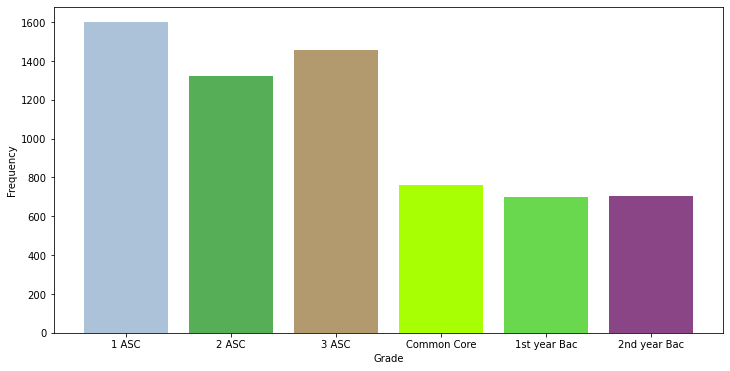

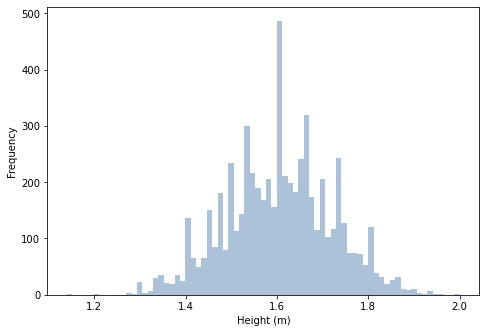

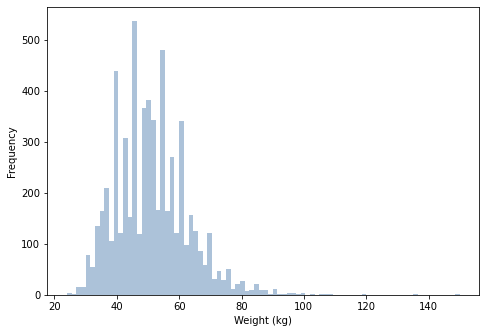

In [339]:
#Age distribution
#responses_by_question_stats(0, 'Age', ['<11', '12','13','14','15','16+'], 'bar'); #2010
responses_by_question_stats(0, 'Age', ['<11', '12','13','14','15','16','17','18+'], 'bar'); #2016

#Sex distribution
#responses_by_question_stats(1, 'Sex', ['M','F'], 'bar'); #2010
responses_by_question_stats(1, 'Sex', ['M','F'], 'bar'); #2016

#Grade distribution
#responses_by_question_stats(2, 'Grade', ['First preparatory', 'The second preparatory', 'The third preparatory'], 'bar'); #2016
responses_by_question_stats(2, 'Grade', ['1 ASC', '2 ASC', '3 ASC', 'Common Core', '1st year Bac', '2nd year Bac'], 'bar'); #2016

#Height distribution
#responses_by_question_stats(3, 'Height (m)', None, 'hist'); #2010
responses_by_question_stats(3, 'Height (m)', None, 'hist'); #2016

#Weight distribution
#responses_by_question_stats(4, 'Weight (kg)', None, 'hist'); #2010
responses_by_question_stats(4, 'Weight (kg)', None, 'hist'); #2016



In [340]:
#Plot responses by question

#2010


#overviews = ['Q6: During the past 30 days, how often did you go hungry because there was not enough food in your home? ',
#             'Q9: During the past 30 days, how many times per day did you usually drink carbonated soft drinks, such as Coca Cola or Fanta? ',
#             'Q10: During the past 7 days, on how many days did you eat food from a fast food restaurant, such as McDonalds or Pizza Hut? ',
#             'Q15: During the past 12 months, how many times were you physically attacked? ',
#             'Q16: During the past 12 months, how many times were you in a physical fight? ',
#             'Q17: During the past 12 months, how many times were you seriously injured? ',
#             'Q20: During the past 30 days, on how many days were you bullied? ',
#             'Q22: During the past 12 months, how often have you felt lonely? ',
#             'Q23: During the past 12 months, how often have you been so worried about something that you could not sleep at night? ',
#             'Q26: During the past 12 months, how many times did you actually attempt suicide? ',
#             'Q29: During the past 30 days, on how many days did you smoke cigarettes? ',
#             'Q30: During the past 30 days, on how many days did you use any tobacco products other than cigarettes, such as Shisha or Tanfiha? ',
#             'Q32: During the past 7 days, on how many days have people smoked in your presence? ',
#             'Q41: During your life, how many times have you used marijuana (also called Hachich)?' ,
#             'Q42: During the past 30 days, how many times have you used marijuana (also called Hachich)? ',
#             'Q43: During your life, how many times have you used amphetamines or methamphetamines ? ',
#             'Q52: How much time do you spend during a typical or usual day sitting and watching television, playing computer games, talking with friends, or doing other sitting activities such as Play Station or playing chess?',
#             'Q53: During the past 30 days, on how many days did you miss classes or school without permission?',
#             'Q58: During the past 30 days, how often did your parents or guardians go through your things without your approval? ']

#2016
overviews = ['Q6: During the past 30 days, how often did you go hungry because there was not enough food in your home? ',
             'Q9: During the past 30 days, how many times per day did you usually drink carbonated soft drinks, such as Coca-Cola or Fanta?',
             'Q10: During the past 7 days, on how many days did you eat food from a fast food restaurant, such as Mahelaba, Snack, pizeria, Mc Donald?',
             'Q15: During the past 12 months, how many times were you physically attacked?',
             'Q16: During the past 12 months, how many times were you in a physical fight?',
             'Q17: During the past 12 months, how many times were you seriously injured?',
             'Q20: During the past 30 days, on how many days were you bullied?',
             'Q22: During the past 12 months, how often have you felt lonely?',
             'Q23: During the past 12 months, how often have you been so worried about something that you could not sleep at night?',
             'Q26: During the past 12 months, how many times did you actually attempt suicide?',
             'Q29: During the past 30 days, on how many days did you smoke cigarettes?',
             'Q30: During the past 30 days, on how many days did you use any tobacco products other than cigarettes, such as Shisha, Tabac a snifer, Kala?',
             'Q32: During the past 7 days, on how many days have people smoked in your presence?',
             'Q41: During your life, how many times have you used marijuana ?',
             'Q42: During the past 30 days, how many times have you used marijuana ?',
             'Q43: During your life, how many times have you used amphetamines or methamphetamines ?',
             'Q52: How much time do you spend during a typical or usual day sitting and watching television, playing computer games, talking with friends, or doing other sitting activities such as using the computer or cell phone?',
             'Q53: During the past 30 days, on how many days did you miss classes or school without permission?',
             'Q58: During the past 30 days, how often did your parents or guardians go through your things without your approval?']

options_str = [' Never, Rarely, Sometimes, Most of the time, Always',
               ' I did not drink \n carbonated soft drinks \n during the past 30 days, Less than one \n time per day, 1 time per day, 2 times per day, 3 times per day, 4 times per day, 5 or more times per day ',
               ' 0 days, 1 day, 2 days, 3 days, 4 days, 5 days, 6 days, 7 days ',
               ' 0 times, 1 time, 2 or 3 times, 4 or 5 times, 6 or 7 times, 8 or 9 times, 10 or 11 times, 12 or more times ',
               ' 0 times, 1 time, 2 or 3 times, 4 or 5 times, 6 or 7 times, 8 or 9 times, 10 or 11 times, 12 or more times ',
               ' 0 times, 1 time, 2 or 3 times, 4 or 5 times, 6 or 7 times, 8 or 9 times, 10 or 11 times, 12 or more times ',
               ' 0 days, 1 or 2 days, 3 to 5 days, 6 to 9 days, 10 to 19 days, 20 to 29 days, All 30 days',
               ' Never, Rarely, Sometimes, Most of the time, Always',
               ' Never, Rarely, Sometimes, Most of the time, Always',
               ' 0 times, 1 time, 2 or 3 times, 4 or 5 times, 6 or more times',
               ' 0 days, 1 or 2 days, 3 to 5 days, 6 to 9 days, 10 to 19 days, 20 to 29 days, All 30 days ',
               ' 0 days, 1 or 2 days, 3 to 5 days, 6 to 9 days, 10 to 19 days, 20 to 29 days, All 30 days ',
               ' 0 days, 1 or 2 days, 3 or 4 days, 5 or 6 days, All 7 days',
               ' 0 times, 1 or 2 times, 3 to 9 times, 10 to 19 times, 20 or more times',
               ' 0 times, 1 or 2 times, 3 to 9 times, 10 to 19 times, 20 or more times ',
               ' 0 times, 1 or 2 times, 3 to 9 times, 10 to 19 times, 20 or more times ',
               ' Less than 1 \n hour per day, 1 to 2 hours per day, 3 to 4 hours per day, 5 to 6 hours per day, 7 to 8 hours per day, More than 8 hours per day ',
               ' 0 days, 1 or 2 days, 3 to 5 days, 6 to 9 days, 10 or more days ',
               ' Never, Rarely, Sometimes, Most of the time, Always']




options = []
for question in options_str:
    options.append(question.split(','))
    

In [341]:
#Function to visualize responses of the participants

def responses_by_question(question, label, ticks, plot):
    
    responses = []
    for participant in range(len(answers)):
        response = answers[participant][question]
        if response!='':
            responses.append(float(response))
    c = Counter(responses)
    c = sorted(c.items())
    responses_num = [i[0] for i in c]
    freq = [i[1] for i in c]

    f, ax = plt.subplots(figsize=(15, 6))
    
    if plot == True:
        if len(responses_num) == len(ticks.split(',')):
            bars = ax.bar(ticks.split(','), freq, color=color_options[:len(c)])
            ax.set_xlabel(label)
            ax.set_ylabel("Frequency")
            
            # Axis formatting.
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_color('#DDDDDD')
            ax.tick_params(bottom=False, left=False)
            ax.set_axisbelow(True)
            ax.yaxis.grid(True, color='#EEEEEE')
            ax.xaxis.grid(False)

            for bar in bars:
                ax.text(
                  bar.get_x() + bar.get_width() / 2,
                  bar.get_height() + 15,
                  round(bar.get_height(), 1),
                  horizontalalignment='center',
                  color=bar.get_facecolor(),
                  weight='bold'
              )

    return responses

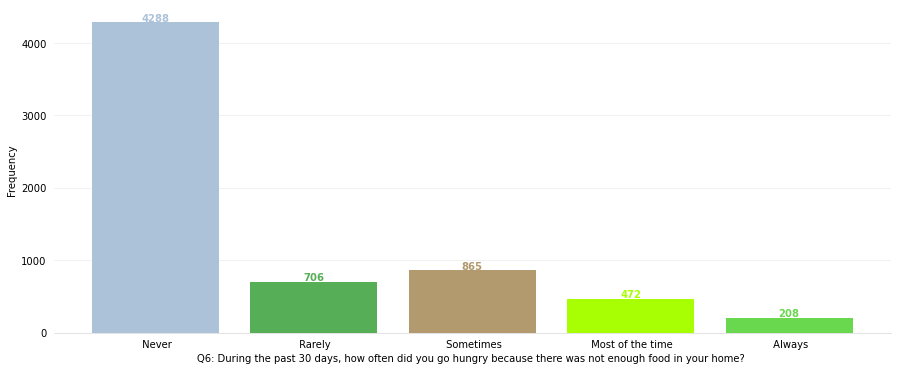

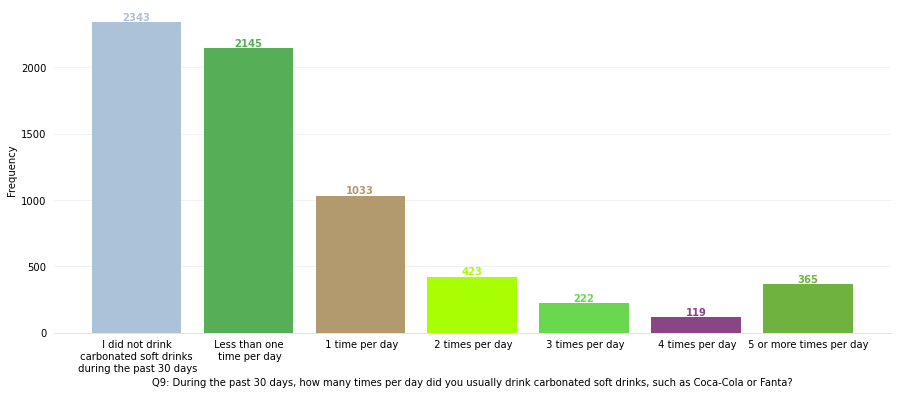

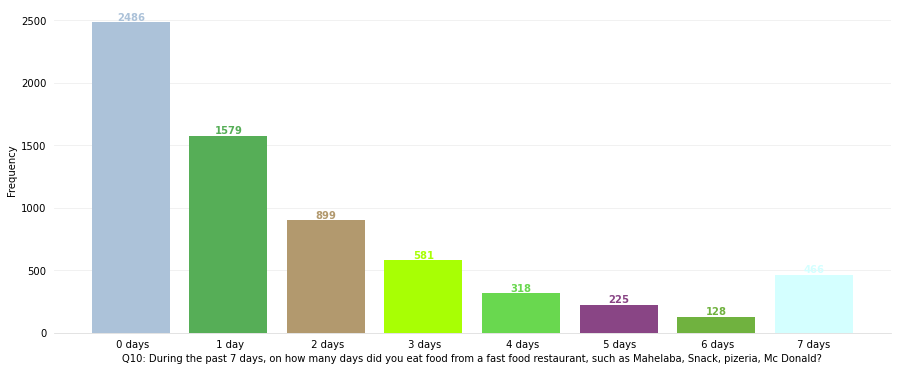

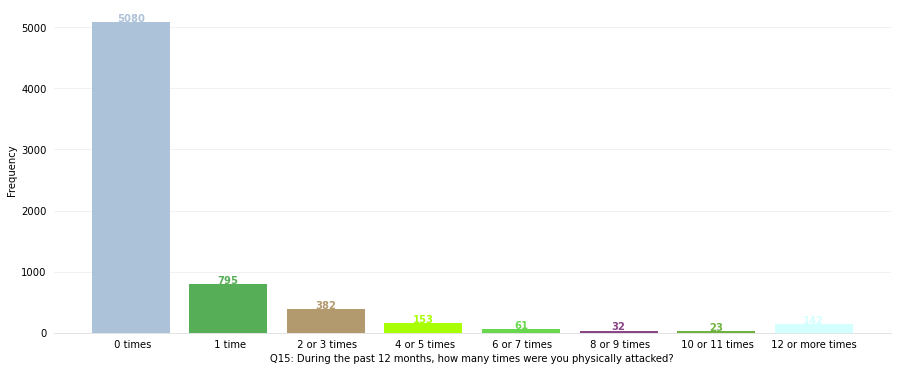

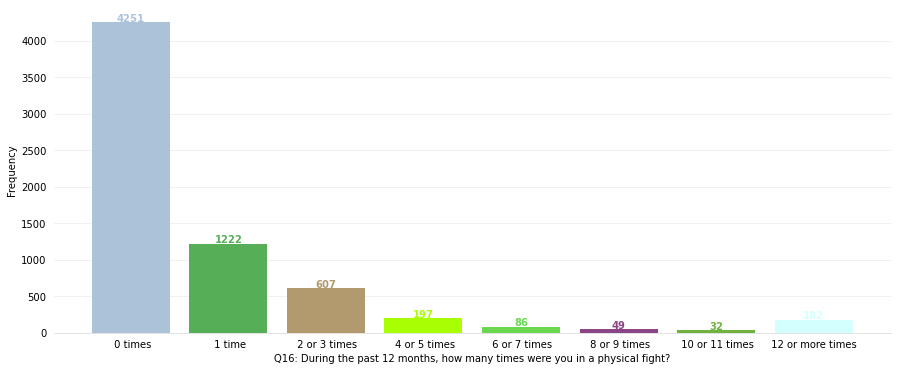

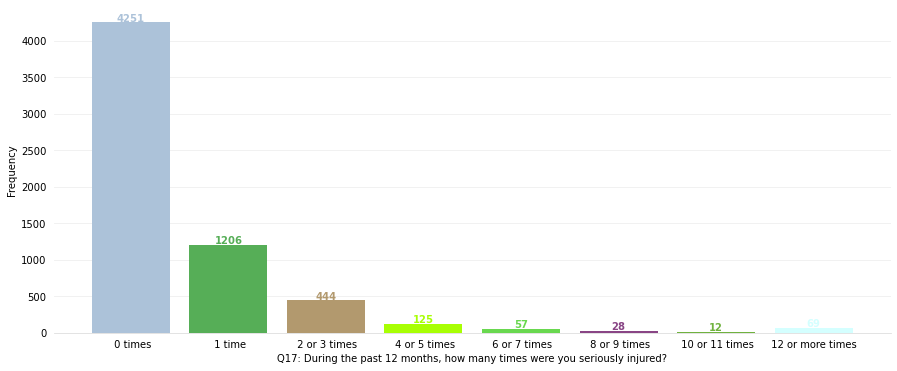

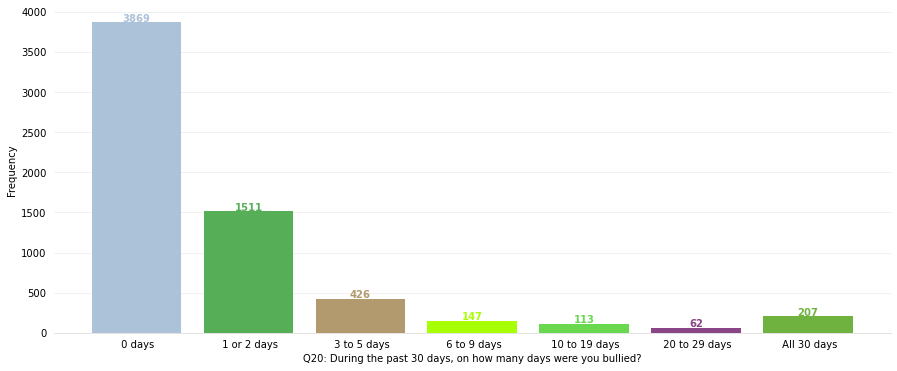

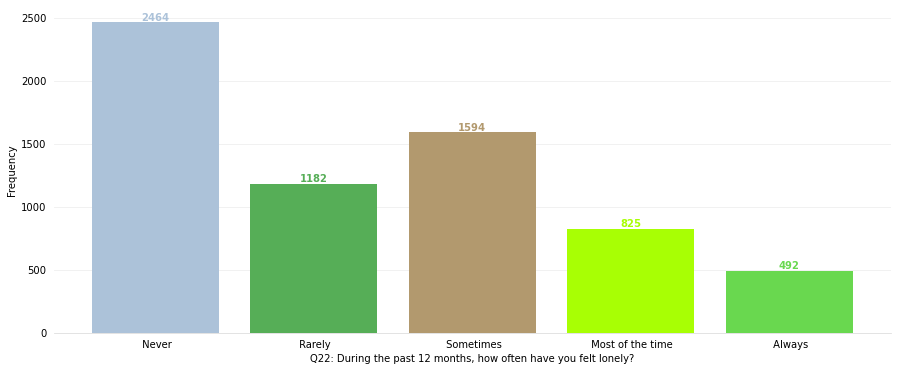

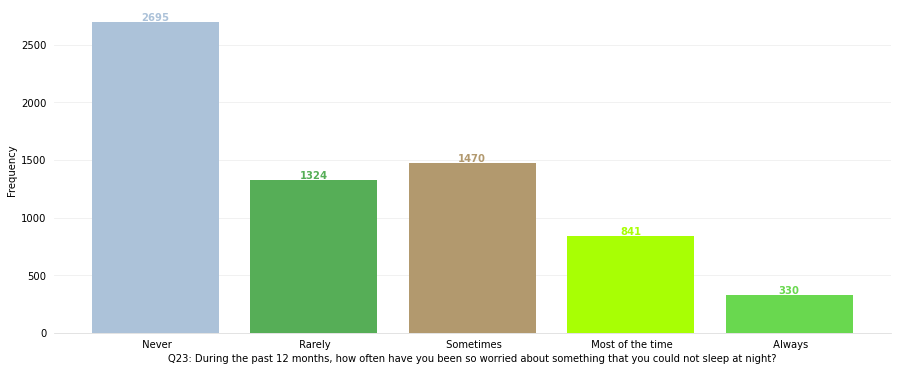

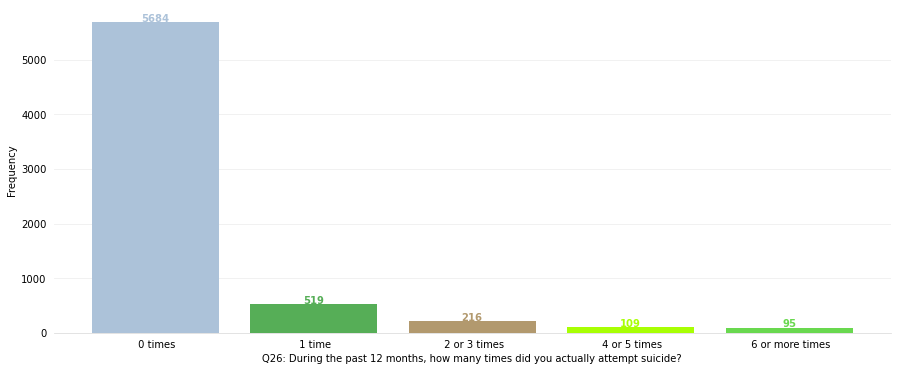

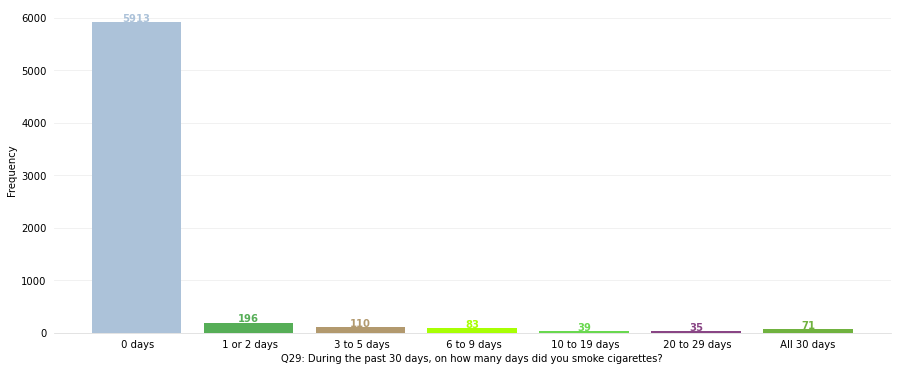

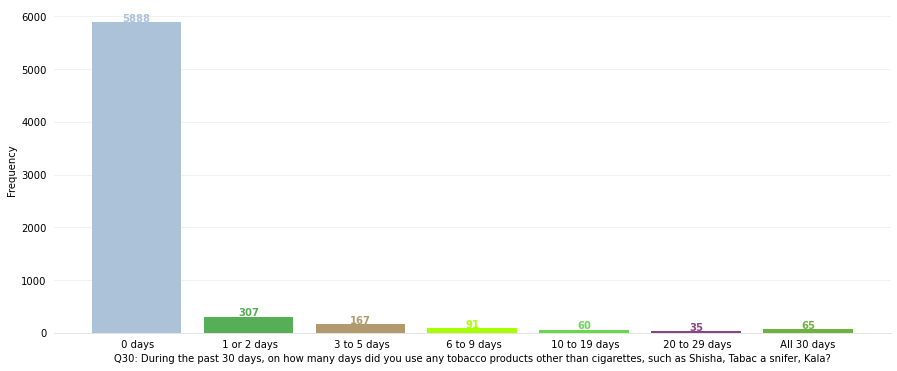

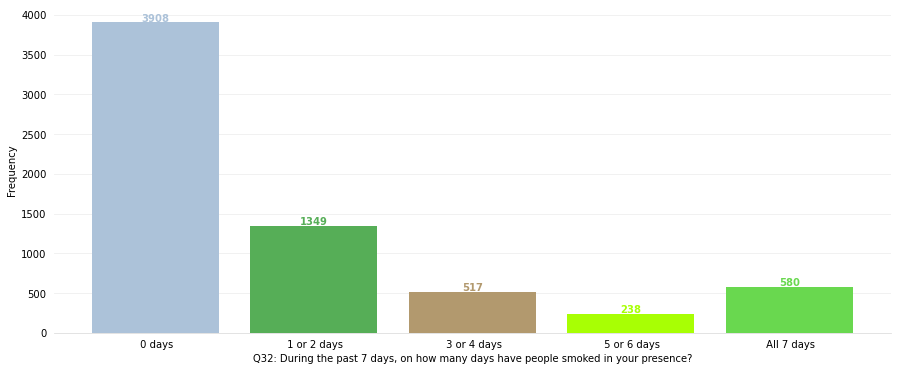

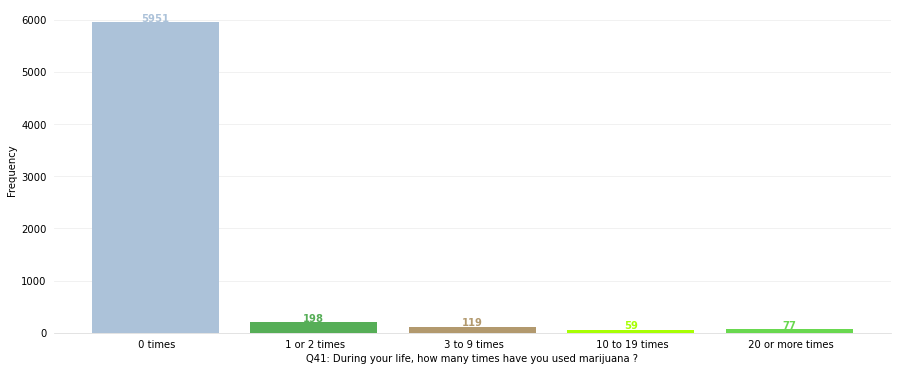

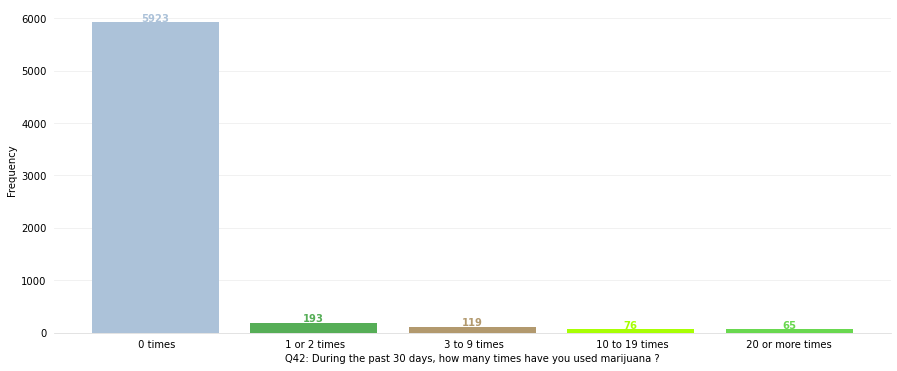

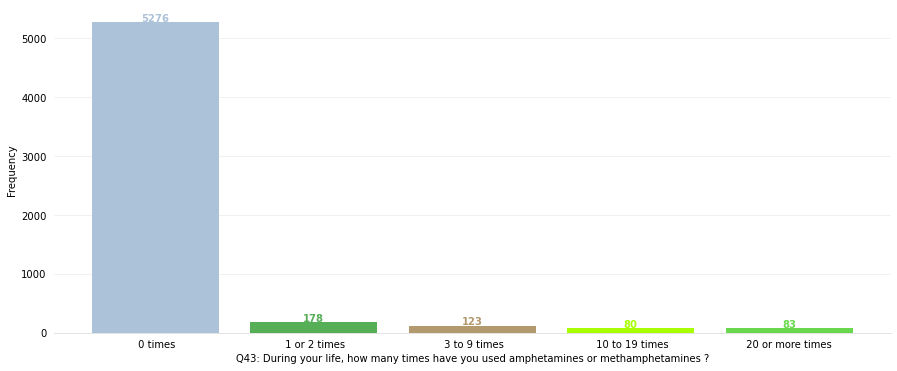

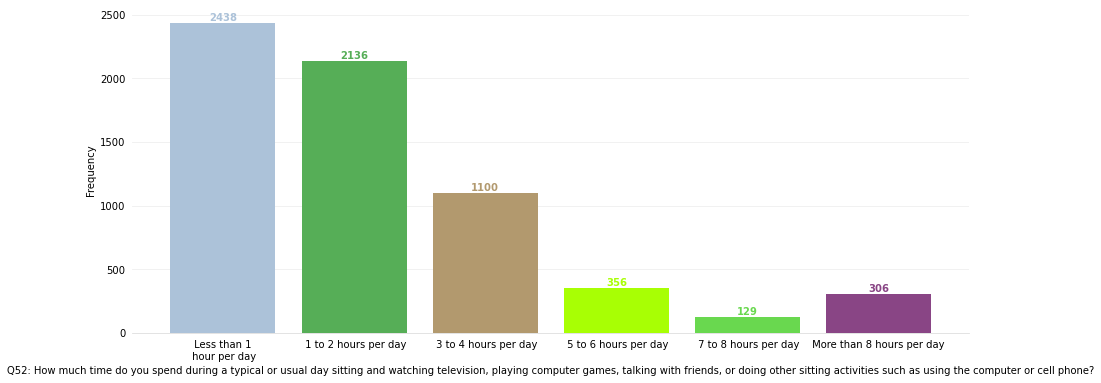

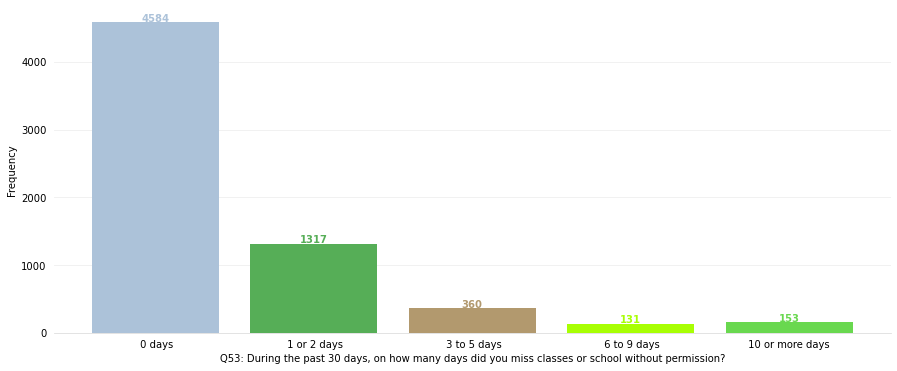

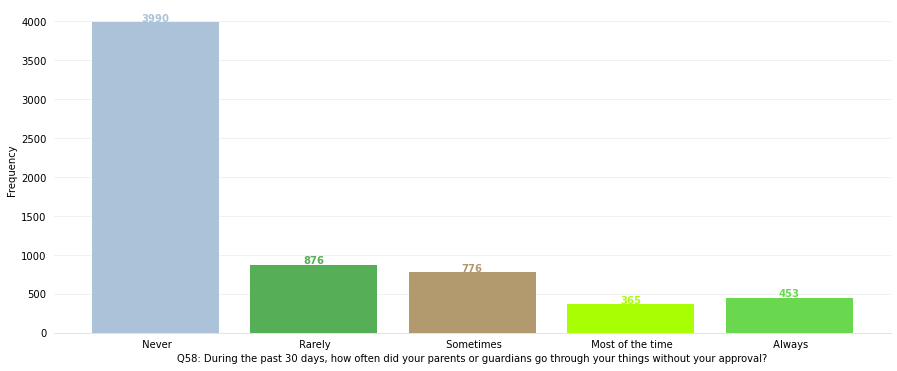

In [342]:
#Responses by question
for question in range(len(ascending_question_numbers)):
    responses_by_question(ascending_question_numbers[question], overviews[question], options_str[question], True)

In [343]:
#Make a matrix of answers to questions of interest
#If the participant answered all questions of interest
ascending_question_answers = []

for participant in range(len(answers)):
    na = 0
    answers_by_participant = []
    for question in ascending_question_numbers:
        answer = answers[participant][question]
        if answer!='':
            answers_by_participant.append(float(answer))
        else:
            na = 1
    if na == 0:
        ascending_question_answers.append(answers_by_participant)

In [344]:
#Turn matrix into a DataFrame for further analysis
ascending_question_answers_df = pd.DataFrame(ascending_question_answers)
ascending_question_names = []
for number in ascending_question_numbers:
    ascending_question_names.append('Q'+str(number+1))
ascending_question_answers_df.columns = ascending_question_names

#Replace missing values with 0s (this is only for clustering, these will be disregarded in averages)
ascending_question_answers_df = ascending_question_answers_df.replace('', 0)

#To work on copy of the data
ascending_question_answers_df_scaled = ascending_question_answers_df.copy()

# Scaling the data to keep the different attributes in same range.
ascending_question_answers_df_scaled[ascending_question_answers_df_scaled.columns] = StandardScaler().fit_transform(ascending_question_answers_df_scaled)
print(ascending_question_answers_df_scaled.describe())

                 Q6            Q9           Q10           Q15           Q16  \
count  4.176000e+03  4.176000e+03  4.176000e+03  4.176000e+03  4.176000e+03   
mean   1.309882e-15 -2.122876e-16 -7.620354e-16  4.603597e-16  6.742159e-17   
std    1.000120e+00  1.000120e+00  1.000120e+00  1.000120e+00  1.000120e+00   
min   -5.912217e-01 -8.265783e-01 -7.917327e-01 -3.514503e-01 -4.754122e-01   
25%   -5.912217e-01 -8.265783e-01 -7.917327e-01 -3.514503e-01 -4.754122e-01   
50%   -5.912217e-01 -1.545006e-01 -2.922953e-01 -3.514503e-01 -4.754122e-01   
75%    3.687090e-01  5.175771e-01  2.071422e-01 -3.514503e-01  3.043684e-01   
max    3.248501e+00  3.205888e+00  2.704329e+00  5.738410e+00  4.983052e+00   

                Q17           Q20           Q22           Q23           Q26  \
count  4.176000e+03  4.176000e+03  4.176000e+03  4.176000e+03  4.176000e+03   
mean  -9.890582e-16  2.011216e-17 -5.529846e-18  3.098575e-17  1.236240e-17   
std    1.000120e+00  1.000120e+00  1.000120e+00  1.

In [345]:
#Reduce dimensions with PCA
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(ascending_question_answers_df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

# Results from pca.components_
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=ascending_question_answers_df_scaled.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)
    
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")

Explained variation per principal component: [0.20712687 0.10897155]
Cumulative variance explained by 2 principal components: 31.61%


             Q6        Q9       Q10       Q15       Q16       Q17       Q20  \
PC_1  0.093340  0.078391  0.118961  0.207969  0.205273  0.208736  0.166060   
PC_2  0.230344  0.044143  0.061457  0.290665  0.193146  0.263967  0.348155   

           Q22       Q23       Q26       Q29       Q30       Q32       Q41  \
PC_1  0.136320  0.146602  0.170194  0.342267  0.351659  0.218242  0.364624   
PC_2  0.361592  0.343941  0.241459  0.214360  0.223132  0.043275  0.307597   

           Q42       Q43       Q52       Q53       Q58  
PC_1  0.359017  0.328256  0.133703  0.248945  0.086764  
PC_2  0.289285  0.165294  0.094365  0.023978  0.092054  

*************** Most important features *************************
As per PC 1:
 Q29    0.342267
Q30    0.351659
Q41    0.364624
Q42    0.359017
Q43    0.328256
Name: PC_1, dtype: float64


As per PC 2:
 Q20    0.348155
Q22

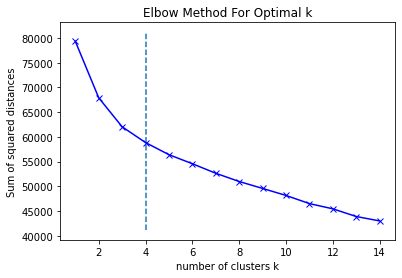

In [346]:
#Fitting KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ascending_question_answers_df_scaled)
    Sum_of_squared_distances.append(km.inertia_)


kn = KneeLocator(range(1, len(Sum_of_squared_distances)+1), Sum_of_squared_distances, curve='convex', direction='decreasing')

plt.title('Elbow Method For Optimal k')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(range(1, len(Sum_of_squared_distances)+1), Sum_of_squared_distances, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

optimal_k = kn.knee


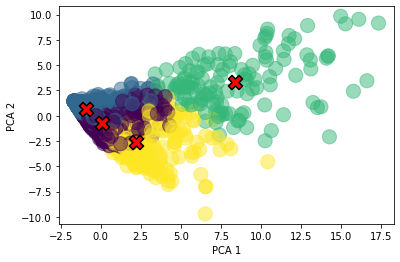

In [347]:
#Fitting KMeans
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(ascending_question_answers_df_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

#Visualizing the clusters
x = pca_2_result[:, 0]
y = pca_2_result[:, 1]

plt.scatter(x, y, c=kmeans.labels_, alpha=0.5, s=200)  # plot different colors per cluster
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,color='red', edgecolors="black", lw=1.5)

plt.show()

In [348]:
#Get info for each cluster
labels = kmeans.labels_
answers_by_cluster = []
for label_interest in range(max(labels)+1):
    answers_interest = []
    for label in range(len(labels)):
        if labels[label] == label_interest:
            answers_interest.append(ascending_question_answers[label])
    answers_by_cluster.append(answers_interest)
    print('Cluster '+str(label_interest+1)+': '+str(len(answers_interest)))
    
#Get averages for each cluster for each question 
all_clusters_question_averages = []
for cluster in range(len(answers_by_cluster)):
    question_averages = []
    for question in range(len(answers_by_cluster[cluster][1])):
        question_responses = []
        for participant in range(len(answers_by_cluster[cluster])):
            entry = (answers_by_cluster[cluster][participant][question])
            if entry!='':
                question_responses.append(int(answers_by_cluster[cluster][participant][question]))
        question_averages.append(np.mean(question_responses))
    all_clusters_question_averages.append(question_averages)
    

Cluster 1: 1490
Cluster 2: 2203
Cluster 3: 128
Cluster 4: 355


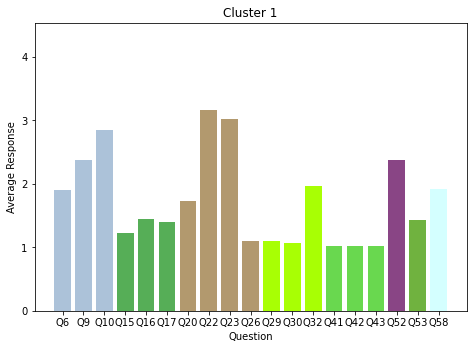

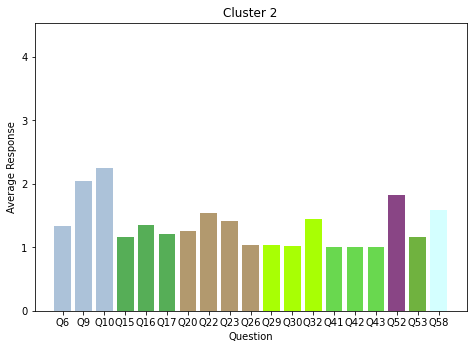

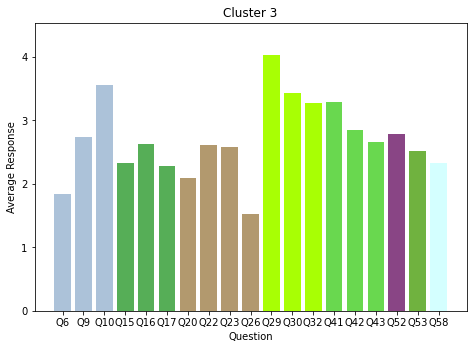

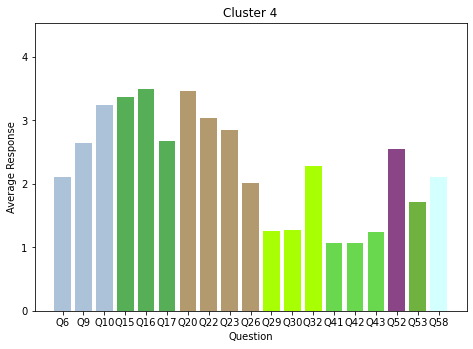

In [349]:
#Plot averages for each question
categories_used = []
colors = []
i = 0
for category in ascending_question_categories:
    if category not in categories_used:
        categories_used.append(category)
        colors.append(color_options[i])
        i+=1
    else:
        colors.append(color_options[i-1])

for cluster in range(len(all_clusters_question_averages)):
    fig = plt.figure()
    ax = fig.add_axes([1,1,1,1])
    ax.bar(range(len(all_clusters_question_averages[cluster])), all_clusters_question_averages[cluster], color=colors)
    ax.set_xlabel('Question')
    ax.set_xticks(list(range(len(all_clusters_question_averages[cluster]))))
    ax.set_xticklabels(ascending_question_names)
    ax.set_ylabel('Average Response')
    plt.title('Cluster '+str(cluster+1))
    max_average = 0
    for cluster in all_clusters_question_averages:
        if max(cluster)>max_average:
            max_average = max(cluster)
    plt.ylim(0,max_average+0.5)
    plt.show()
